#### 문제1. 주어진 concrete_data.csv 데이터셋을 불러오고, 비어있는 행이 있는지 확인해 주세요.


In [1]:
import pandas as pd
DF = pd.read_csv("./concrete_data.csv") ## 데이터 프레임 불러오기

In [2]:
## 비어있는 행이 존재하는지 확인
print(DF.empty) ## 존재하지 않는다.

False


#### 문제2. 주어진 데이터셋을 train 데이터셋과 test 데이터셋으로 분리하고, 각각의 크기를 출력해 주세요.  
(HINT) test 데이터셋의 비율을 0.2로 설정하고, random state를 설정해 주세요.


In [3]:
## 시드 고정

import random ## 시드값을 가져오기 위해서 사용하는 패키지
import numpy as np
class config:
    seed = 2930
    
def seed_global(seed: int = 2930):
    random.seed(seed)
    np.random.seed(seed)

In [4]:
## 데이터를 Train set과 valid set으로 구분 (seed : 2930, 7:3 비율)

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(DF,test_size=0.2,shuffle=True,random_state=2930) ## 순차적 추출일 경우에는 shuffle을 false로 둔다.
## shape으로 train test 길이 크기 확인한다.
print("xtrain shape: {} 이고, xtest shape: {} 입니다.".format(X_train.shape, X_test.shape))

xtrain shape: (824, 8) 이고, xtest shape: (206, 8) 입니다.


#### 문제3. 학습 데이터(train)의 기술통계량과 변수별 분포와 관계를 확인하세요.
(HINT) seaborn 라이브러리를 활용하면 편합니다.


In [5]:
### 기술 통계량 확인 -> pandas의 describe 사용
DF_기술통계량 = DF.describe()
DF_기술통계량

Cement  Blast Furnace Slag        Water  Superplasticizer  \
count  1030.000000         1030.000000  1030.000000       1030.000000   
mean    281.167864           73.895825   181.567282          6.204660   
std     104.506364           86.279342    21.354219          5.973841   
min     102.000000            0.000000   121.800000          0.000000   
25%     192.375000            0.000000   164.900000          0.000000   
50%     272.900000           22.000000   185.000000          6.400000   
75%     350.000000          142.950000   192.000000         10.200000   
max     540.000000          359.400000   247.000000         32.200000   

       Coarse Aggregate  Fine Aggregate          Age     Strength  
count       1030.000000     1030.000000  1030.000000  1030.000000  
mean         972.918932      773.580485    45.662136    35.817961  
std           77.753954       80.175980    63.169912    16.705742  
min          801.000000      594.000000     1.000000     2.330000  
25%          932.000000      730.950000     7.000000    23.710000  
50%          968.000000      779.500000    28.000000    34.445000  
75%         1029.400000      824.000000    56.000000    46.135000  
max         1145.000000      992.600000   365.000000    82.600000

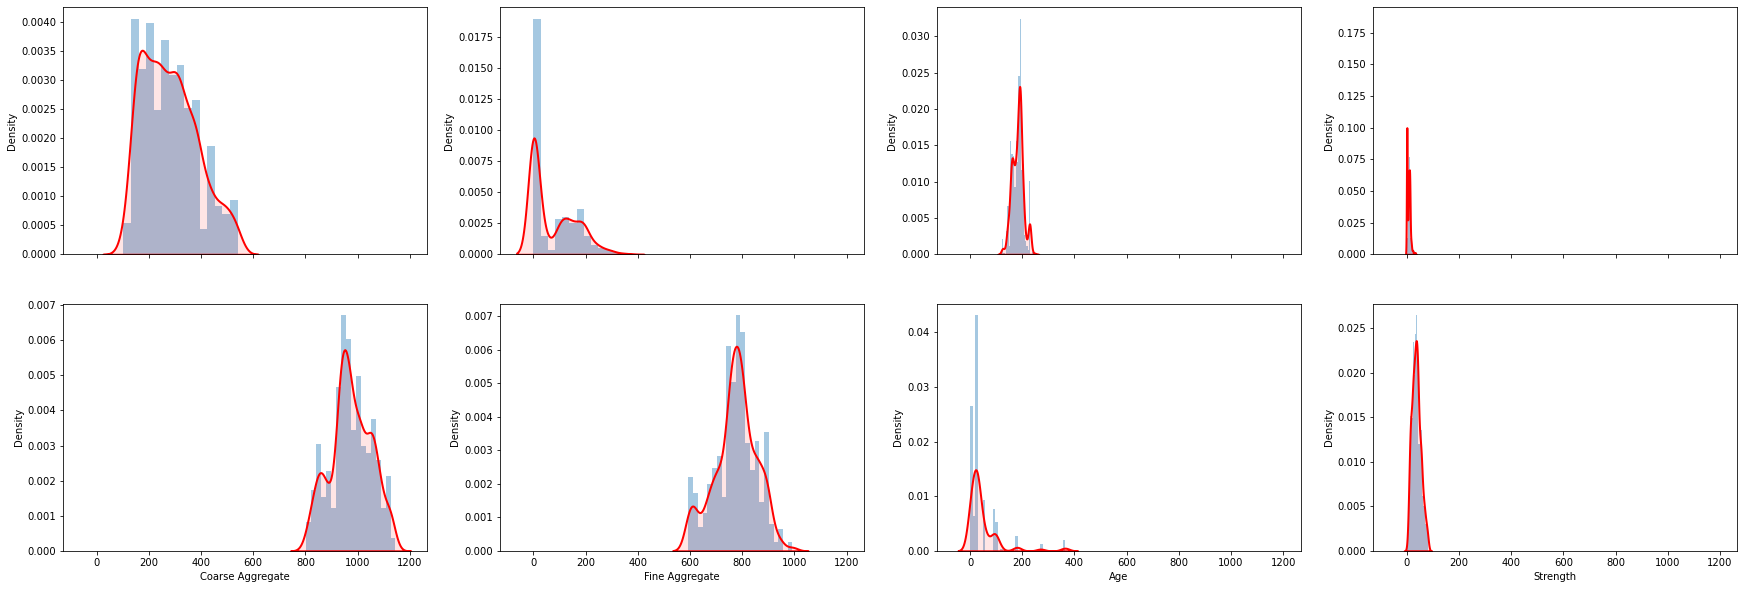

In [6]:
### 경고 메시지 제거
import warnings
warnings.filterwarnings(action='ignore')

### 변수별 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
list_name = list(DF.columns)

f, axes = plt.subplots(2, 4, figsize = (30,10),sharex = True) ## 2, 4 짜리 기본 그래프 틀을 제작하고. figure size는 잘 안보여서 30, 10으로 키웠다.
axes_r = 0 ## default row 값
axes_c = 0 ## default column 값
for col in list_name:
    if (axes_c > 3): ## 인덱스는 0부터 세므로, column이 3보다 커지면(4가 되면), 아래 줄로 내려가는 코드를 작성
        axes_c = 0 ## column 이 3보다 커지므로, 아래 줄로 내려가 첫번째 컬럼으로 가야함
        axes_r = axes_r + 1 ## row가 1번째 로우가 아닌 다음 row로 변경됨
    sns.distplot(a = DF[col], kde  = True, ax = axes[axes_r, axes_c], kde_kws = {"color": "red", "alpha": 0.1, "linewidth": 2, "shade": True}) ## 색상, 투명도, 라인 굵기, 도형 채우기
    axes_c = axes_c + 1 ## 다음 column 줄에 그린다.

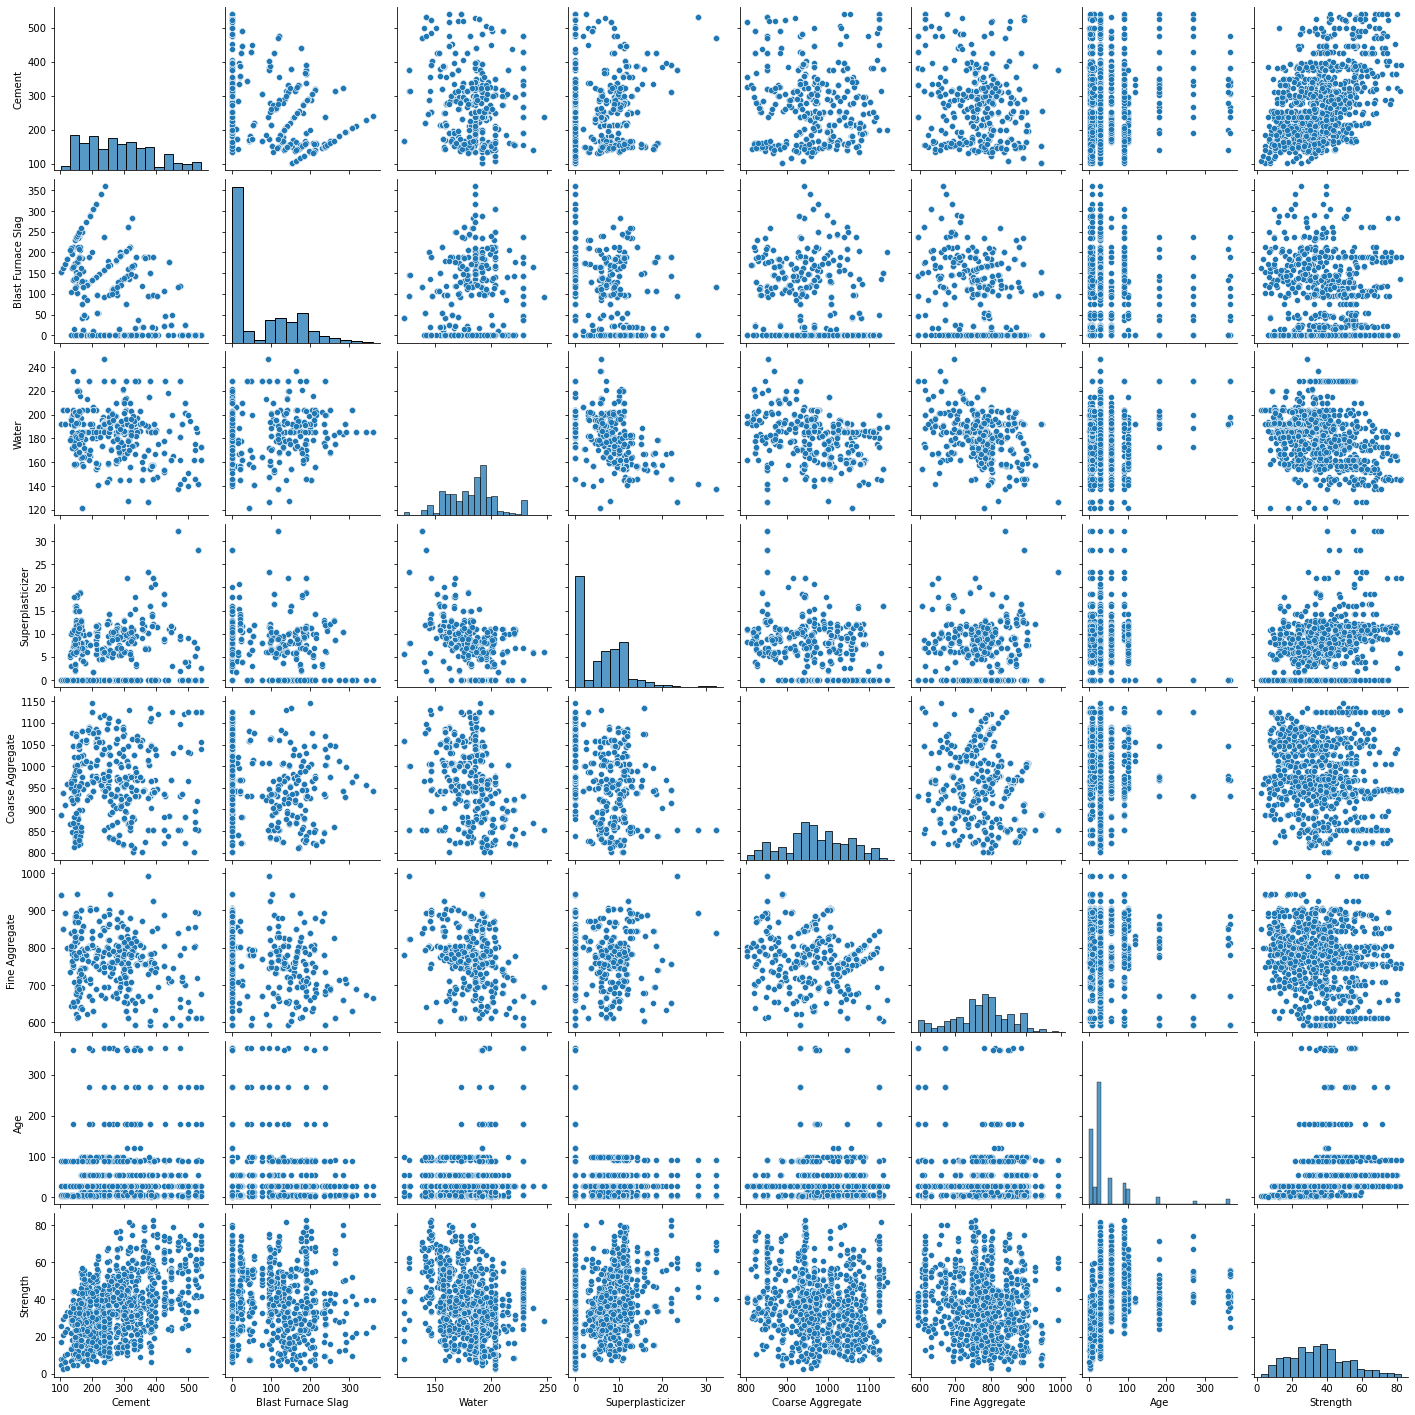

In [7]:
### 관계 그래프 그리기
sns.pairplot(data = DF) ## 간단히 pairplot을 통해서 관계 그래프를 표현할 수 있다.

#### 문제4. 변수들 간의 상관계수 행렬을 확인하고, 이를 히트맵으로 시각화 하세요.
(HINT) seaborn 라이브러리를 활용하면 편합니다.


<AxesSubplot:>

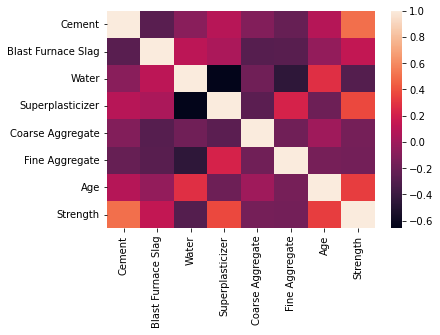

In [8]:
### correlation 구하기
corr_feature = DF.corr()
### 히트 맵으로 표현 -> seaborn에 존재하는 heatmap을 통해서 표현한다.
sns.heatmap(corr_feature)

#### 문제5. VIF(Variance Inflation Factors)가 무엇인지 간략히 설명한 후, VIF를 확인하여 제거해야 할 변수가 있다면 제거해 주세요.
(HINT) statsmodels 라이브러리를 사용하면 편합니다.


##### VIF: 분산팽창 인수란?
<div style = "margin-top: 20px">
    <ol>
        <li> 회귀 분석시 예측 변수들(Xs) 간의 다중공선성(multicollinearity)을 파악해야 한다.
        <li>다중공선성이란 예측 변수들 간의 상관성이 높은지를 파악하는 것이며, 이 값을 VIF로 파악하게 된다.
        <li>VIF는 예측변수들이 상관성이 있을 때 추정 회계 계수의 산포 크기를 측정하는 것이며, 산포가 커질수록 회귀 모형은 신뢰할 수 없게 된다. 
        <li>VIF 값이 1 근방에 있으면 다중공선성이 없어 모형을 신뢰할 수 있으며 만약 VIF 값이 10 이상이 되면 매우 높은 다중공선성이 있기 때문에 변수 선택을 신중히 고려해야 한다.
   </ol>
<div/>  

<div style = "margin-top: 20px">
    <h5>수식으로 표현하면 다음과 같다.<h5/>
<div/>    
        
<div>      
$$ VIF = \frac{1}{(1-R^2(x_1))} $$
<div/> 
 

In [9]:
### 분산팽창인수 적용
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(DF.values, i) for i in range(DF.shape[1])]
vif["features"] = DF.columns
vif = vif.sort_values("VIF Factor").reset_index(drop = True)
vif


VIF Factor            features
0    2.259311                 Age
1    2.537484  Blast Furnace Slag
2    3.602861    Superplasticizer
3   13.241985            Strength
4   14.470359              Cement
5   68.689289      Fine Aggregate
6   73.646231               Water
7   83.449964    Coarse Aggregate

In [10]:
list_VIF_remove = list()
for i in range(len(vif["VIF Factor"])):
    if (vif["VIF Factor"][i] >= 10):
        list_VIF_remove.append(vif["features"][i])
        
print("제거해야 하는 변수 리스트: {}".format(list_VIF_remove)) 

제거해야 하는 변수 리스트: ['Strength', 'Cement', 'Fine Aggregate', 'Water', 'Coarse Aggregate']


#####  변수 제거: 제거하는 변수 리스트에서 	Strength, Water, Coarse Aggreagate을 제외하고는 변수에서 제거한다. 
큰 변수들 간 다중공선성이 존재하는 것이기 때문에, 큰 것부터 제거해나가도록 한다. 필자는 제일 큰 Water와 Coarse Aggregate를 먼저 제거해본 이후에, 다시 한 번 VIF 지수를 사용해보도록 하겠다.

In [11]:
list_not_multicollinearity = list(set(DF.columns) - set(list_VIF_remove))
print("다중공선성에 어긋나지 않는 변수 리스트: {}".format(list_not_multicollinearity))

### Cement와 Fine Aggregate 추가
list_not_multicollinearity = list_not_multicollinearity + ["Strength", "Cement", "Fine Aggregate"]

다중공선성에 어긋나지 않는 변수 리스트: ['Age', 'Blast Furnace Slag', 'Superplasticizer']


In [12]:
list_not_multicollinearity
DF_new = DF[list_not_multicollinearity]
DF_new.head()

Age  Blast Furnace Slag  Superplasticizer  Strength  Cement  Fine Aggregate
0   28                 0.0               2.5     79.99   540.0           676.0
1   28                 0.0               2.5     61.89   540.0           676.0
2  270               142.5               0.0     40.27   332.5           594.0
3  365               142.5               0.0     41.05   332.5           594.0
4  360               132.4               0.0     44.30   198.6           825.5

In [13]:
## 다시 한번 공선성을 파악한다.
### 분산팽창인수 적용
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(DF_new.values, i) for i in range(DF_new.shape[1])] ## VIF 변수를 반복문을 통해서 계산한다.
vif["features"] = DF_new.columns ## feature로 이루어진 열을 만들어준다.
vif = vif.sort_values("VIF Factor").reset_index(drop = True) ## sort 한다.
vif

VIF Factor            features
0    1.965302  Blast Furnace Slag
1    2.044520                 Age
2    2.950497    Superplasticizer
3    9.101021      Fine Aggregate
4   11.907287              Cement
5   12.478250            Strength

##### VIF 변수 제거 결과 해석
결과를 보면, VIF Factor가 모두 10보다 작음을 확인할 수 있다. 두개의 변수를 제거하고 사용하도록 한다.

#### 문제6. 변수별로 이상치가 있는지 파악하기 위해 Boxplot을 아래와 같이 시각화 하세요.
그래프의 크기는 (20, 15)로 지정


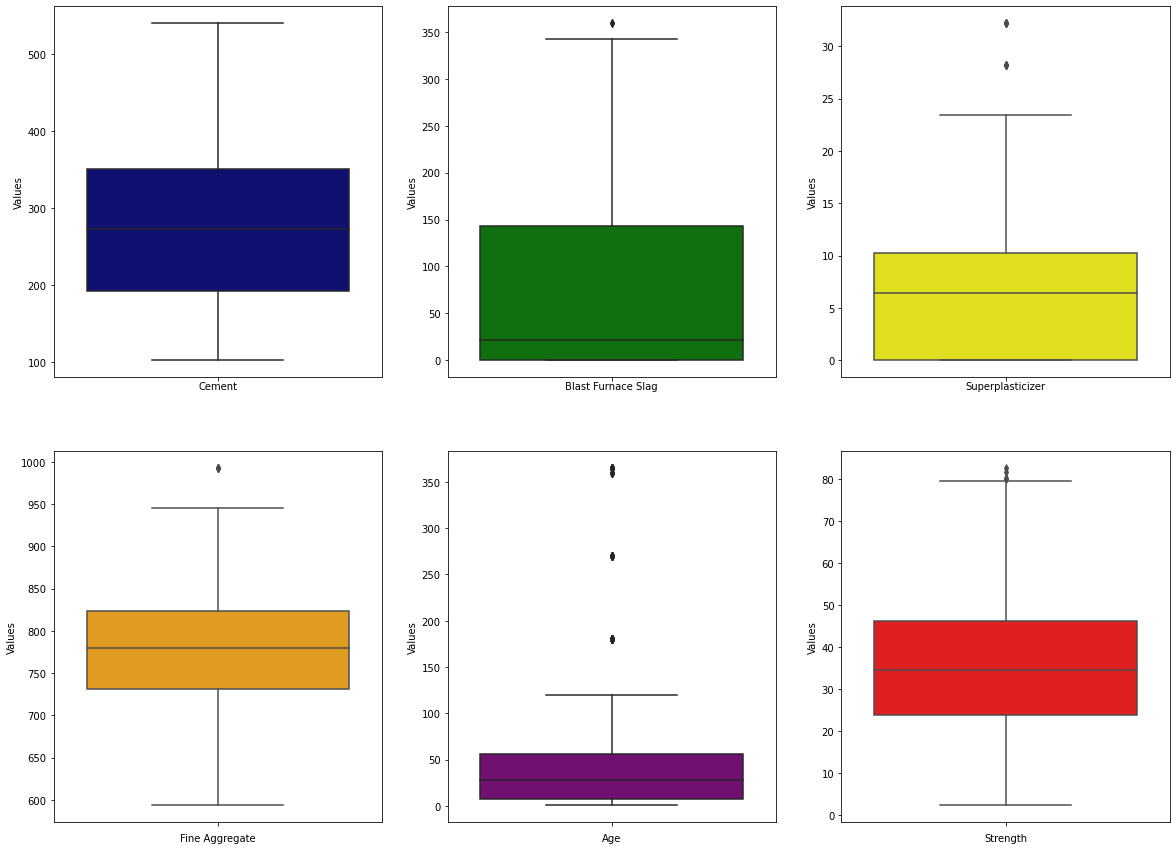

In [14]:
f, axes = plt.subplots(2, 3, figsize = (20,15),sharex = True) ## 2, 4 짜리 기본 그래프 틀을 제작하고. figure size는 잘 안보여서 30, 10으로 키웠다.
axes_r = 0 ## default row 값
axes_c = 0 ## default column 값
list_name = ["Cement", "Blast Furnace Slag", "Superplasticizer", "Fine Aggregate","Age","Strength"] ## 열 이름 리스트 제작
list_color = ["navy", "green", "yellow", "orange", "purple", "red"] ## 색상 리스트를 직접 제작
for length in range(len(list_name)):
    if (axes_c > 2): ## 인덱스는 0부터 세므로, column이 2보다 커지면(3가 되면), 아래 줄로 내려가는 코드를 작성
        axes_c = 0 ## column 이 2보다 커지므로, 아래 줄로 내려가 첫번째 컬럼으로 가야함
        axes_r = axes_r + 1 ## row가 1번째 로우가 아닌 다음 row로 변경됨
    ax = sns.boxplot(y= DF_new[list_name[length]].values,ax = axes[axes_r, axes_c], color=list_color[length]) ## y값 지정, figure 위치 지정, 색상 지정
    ## set으로 지정할 요소 dictionary 제작 -> ylabel, xlabel 넣을 때 사용 -> title도 가능
    props = {
        'ylabel': 'Values', 
        'xlabel': list_name[length] 
    } 
    ax.set(**props) ## 그래프에 요소들을 적용시켜준다.
    """
    ** 표시의 의미는??? 
    keyword argument로 kwargs라고 부른다.
    **kwargs 는 (key = value) 형태로 함수를 호출할 수 있다.
    즉, 그대로 딕셔너리 형태로 {key: value} 이런 식으로 함수 내부로 전달할 수 있다.
    """
    axes_c = axes_c + 1 ## 다음 column 줄에 그린다.

##### 문제7. 주어진 outlier.py를 설명에 따라 완성하고, del_outlier 함수를 활용하여 이상치를 제거해 주세요.
outlier.py를 제작하고 import 해서 불러오도록 하자!!
